In [1]:
%run ../convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Fashion MNIST

In [13]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_valid = X_train[5000:] / 250.0, X_train[:5000] / 250.0
y_train, y_valid = y_train[5000:], y_train[:5000]
X_test = X_test / 250.0

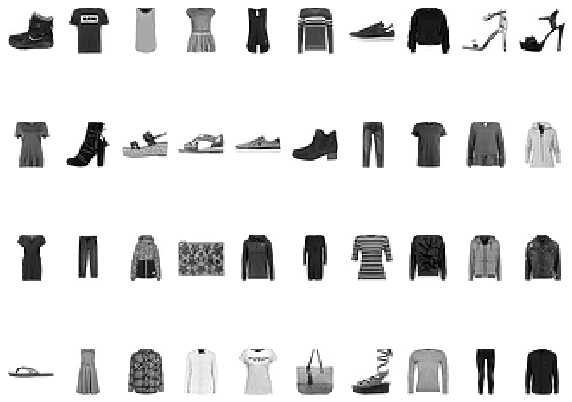

In [6]:
fig, axes = plt.subplots(4, 10, subplot_kw = {'xticks':[], 'yticks':[]}, figsize = (10, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap = 'binary')

In [18]:
model = Sequential([
    Flatten(),
    Dense(30, activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:
model.layers

In [20]:
checkpoint_cb = ModelCheckpoint('fashion_mnist_model.h5', save_best_only=True)
early_cb = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data = [X_valid, y_valid], epochs = 10, callbacks = [checkpoint_cb, early_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 140us/step - loss: 0.3103 - accuracy: 0.8893 - val_loss: 0.3663 - val_accuracy: 0.8824
Epoch 2/10
55000/55000 [==============================] - 8s 146us/step - loss: 0.3067 - accuracy: 0.8897 - val_loss: 0.3604 - val_accuracy: 0.8820
Epoch 3/10
55000/55000 [==============================] - 9s 160us/step - loss: 0.3034 - accuracy: 0.8914 - val_loss: 0.3666 - val_accuracy: 0.8744
Epoch 4/10
55000/55000 [==============================] - 9s 166us/step - loss: 0.3032 - accuracy: 0.8915 - val_loss: 0.3947 - val_accuracy: 0.8736
Epoch 5/10
55000/55000 [==============================] - 9s 166us/step - loss: 0.3013 - accuracy: 0.8927 - val_loss: 0.3898 - val_accuracy: 0.8764
Epoch 6/10
55000/55000 [==============================] - 9s 164us/step - loss: 0.2996 - accuracy: 0.8942 - val_loss: 0.4232 - val_accuracy: 0.8666
Epoch 7/10
55000/55000 [==============================] - 9s 16

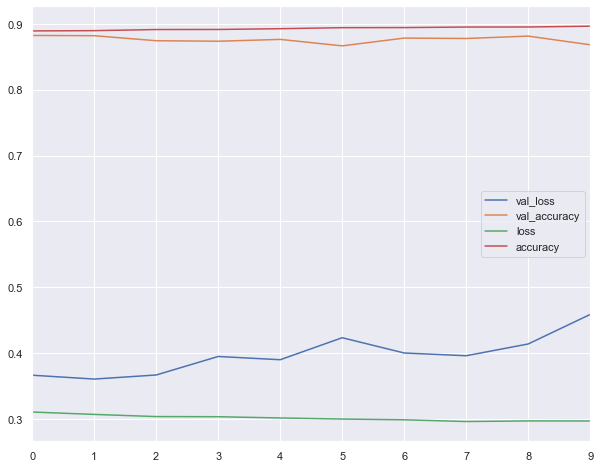

In [22]:
df = pd.DataFrame(history.history)
df.plot(figsize = (10, 8))

In [24]:
from keras.models import load_model
fashion_mnist_model = load_model('fashion_mnist_model.h5')
fashion_mnist_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_14 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


In [31]:
fashion_mnist_model.evaluate(X_test, y_test)


10000/10000 [==============================] - 0s 44us/step


[0.3930051882982254, 0.8694000244140625]

In [32]:
from sklearn.metrics import accuracy_score
y_pred = fashion_mnist_model.predict_classes(X_test)
accuracy_score(y_pred, y_test)

0.8694

# Dynamic Layer

In [51]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state = 6)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [52]:
from keras.layers import Input, Concatenate
from keras.models import Model
def split_input(arr):
    return [arr[:,:7], arr[:,5:]]
X_train = split_input(X_train)
X_valid = split_input(X_valid)
X_test = split_input(X_test)

input_A = Input(shape = (7,))
input_B = Input(shape = (8,))
hidden1 = Dense(30, activation  = 'relu')(input_B)
hidden2 = Dense(30, activation = 'relu')(hidden1)
concat = Concatenate()([input_A, hidden2])
output = Dense(1)(concat)
model = Model(inputs = [input_A, input_B], outputs = [output])
model.compile(optimizer = 'adam', loss = 'mse')

In [53]:
checkpoint_cb = ModelCheckpoint('boston_model.h5', save_best_only=True)
early_cb = EarlyStopping(patience=8, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data = [X_valid, y_valid], epochs = 30, callbacks = [checkpoint_cb, early_cb])

Train on 284 samples, validate on 95 samples
Epoch 1/30
284/284 [==============================] - 1s 2ms/step - loss: 598.6607 - val_loss: 539.1621
Epoch 2/30
284/284 [==============================] - 0s 198us/step - loss: 584.4226 - val_loss: 525.0912
Epoch 3/30
284/284 [==============================] - 0s 72us/step - loss: 569.0188 - val_loss: 508.6415
Epoch 4/30
284/284 [==============================] - 0s 86us/step - loss: 549.8861 - val_loss: 489.1254
Epoch 5/30
284/284 [==============================] - 0s 92us/step - loss: 526.4547 - val_loss: 465.2847
Epoch 6/30
284/284 [==============================] - 0s 90us/step - loss: 498.9038 - val_loss: 436.3448
Epoch 7/30
284/284 [==============================] - 0s 98us/step - loss: 464.4502 - val_loss: 402.7920
Epoch 8/30
284/284 [==============================] - 0s 161us/step - loss: 426.9228 - val_loss: 363.1785
Epoch 9/30
284/284 [==============================] - 0s 76us/step - loss: 381.8784 - val_loss: 319.4653
Epoch 10/

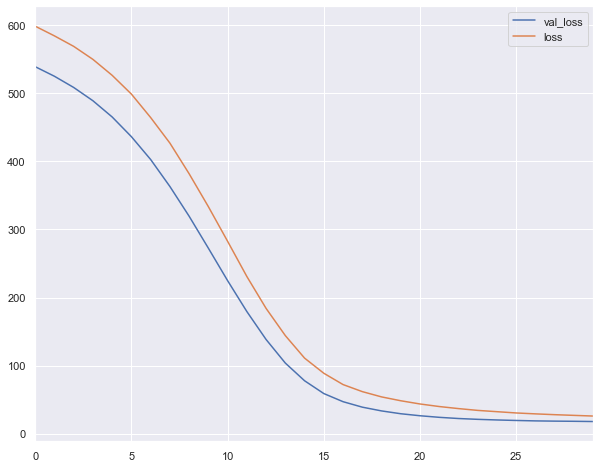

In [56]:
df = pd.DataFrame(history.history)
df.plot(figsize = (10,8))



# Tuning hyperparameters

In [66]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import RandomizedSearchCV
from keras.optimizers import Adam
from scipy.stats import reciprocal

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state = 6)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [67]:
def model_constructor(n_hidden = 1, units = 30, learning_rate = .001, activation = 'relu'):
    model = Sequential()
    for _ in range(n_hidden):
        model.add(Dense(units, activation = activation))
    model.add(Dense(3))
    model.compile(optimizer = Adam(learning_rate), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model
        

In [77]:
model = KerasClassifier(model_constructor)
param_dist = {
    'n_hidden' : range(1, 9),
    'units' : range(1, 100),
    'learning_rate': reciprocal(3e-4, 3e-2)
}

grid = RandomizedSearchCV(model, param_dist, n_iter = 10, cv = 4)
history = grid.fit(X_train, y_train, validation_data = [X_valid, y_valid], epochs = 20, callbacks = [EarlyStopping(patience = 8, restore_best_weights = True)])

Train on 74 samples, validate on 34 samples
Epoch 1/20
74/74 [==============================] - 0s 4ms/step - loss: 4.8425 - accuracy: 0.4730 - val_loss: 1.0986 - val_accuracy: 0.2647
Epoch 2/20
74/74 [==============================] - 0s 161us/step - loss: 1.0986 - accuracy: 0.3649 - val_loss: 1.0986 - val_accuracy: 0.2647
Epoch 3/20
74/74 [==============================] - 0s 213us/step - loss: 1.0986 - accuracy: 0.3649 - val_loss: 1.0986 - val_accuracy: 0.2647
Epoch 4/20
74/74 [==============================] - 0s 265us/step - loss: 1.0986 - accuracy: 0.3649 - val_loss: 1.0986 - val_accuracy: 0.2647
Epoch 5/20
74/74 [==============================] - 0s 234us/step - loss: 1.0986 - accuracy: 0.3649 - val_loss: 1.0986 - val_accuracy: 0.2647
Epoch 6/20
74/74 [==============================] - 0s 224us/step - loss: 1.0986 - accuracy: 0.3649 - val_loss: 1.0986 - val_accuracy: 0.2647
Epoch 7/20
74/74 [==============================] - 0s 254us/step - loss: 1.0986 - accuracy: 0.3649 - val_

74/74 [==============================] - 0s 277us/step - loss: 1.0986 - accuracy: 0.4189 - val_loss: 1.0986 - val_accuracy: 0.2353
Epoch 12/20
74/74 [==============================] - 0s 248us/step - loss: 1.0986 - accuracy: 0.4324 - val_loss: 1.0986 - val_accuracy: 0.2353
Epoch 13/20
74/74 [==============================] - 0s 253us/step - loss: 1.0986 - accuracy: 0.4189 - val_loss: 1.0986 - val_accuracy: 0.2647
Epoch 14/20
25/25 [==============================] - 0s 82us/step
Train on 74 samples, validate on 34 samples
Epoch 1/20
74/74 [==============================] - 0s 6ms/step - loss: 3.5068 - accuracy: 0.2973 - val_loss: 2.3500 - val_accuracy: 0.3235
Epoch 2/20
74/74 [==============================] - 0s 311us/step - loss: 2.6838 - accuracy: 0.2973 - val_loss: 2.1855 - val_accuracy: 0.3235
Epoch 3/20
74/74 [==============================] - 0s 284us/step - loss: 2.2471 - accuracy: 0.3108 - val_loss: 2.1485 - val_accuracy: 0.3235
Epoch 4/20
74/74 [==============================]

75/75 [==============================] - 0s 233us/step - loss: 1.0568 - accuracy: 0.5867 - val_loss: 1.0986 - val_accuracy: 0.4118
Epoch 17/20
75/75 [==============================] - 0s 273us/step - loss: 1.0708 - accuracy: 0.5867 - val_loss: 1.0986 - val_accuracy: 0.4118
Epoch 18/20
75/75 [==============================] - 0s 252us/step - loss: 1.0695 - accuracy: 0.5733 - val_loss: 1.0986 - val_accuracy: 0.3824
Epoch 19/20
75/75 [==============================] - 0s 178us/step - loss: 1.0693 - accuracy: 0.5733 - val_loss: 1.0986 - val_accuracy: 0.3824
Epoch 20/20
24/24 [==============================] - 0s 167us/step
Train on 74 samples, validate on 34 samples
Epoch 1/20
74/74 [==============================] - 0s 6ms/step - loss: 2.5228 - accuracy: 0.2973 - val_loss: 1.0986 - val_accuracy: 0.4412
Epoch 2/20
74/74 [==============================] - 0s 457us/step - loss: 1.0986 - accuracy: 0.5000 - val_loss: 1.0986 - val_accuracy: 0.4412
Epoch 3/20
74/74 [=============================

74/74 [==============================] - 0s 316us/step - loss: 0.9528 - accuracy: 0.2568 - val_loss: 0.9932 - val_accuracy: 0.2059
Epoch 10/20
74/74 [==============================] - 0s 169us/step - loss: 0.9617 - accuracy: 0.2568 - val_loss: 0.9934 - val_accuracy: 0.2059
Epoch 11/20
74/74 [==============================] - 0s 195us/step - loss: 0.9589 - accuracy: 0.2568 - val_loss: 0.9946 - val_accuracy: 0.2059
Epoch 12/20
74/74 [==============================] - 0s 151us/step - loss: 0.9559 - accuracy: 0.2568 - val_loss: 0.9980 - val_accuracy: 0.2059
Epoch 13/20
74/74 [==============================] - 0s 138us/step - loss: 0.9530 - accuracy: 0.2703 - val_loss: 1.0038 - val_accuracy: 0.2059
Epoch 14/20
74/74 [==============================] - 0s 248us/step - loss: 0.9503 - accuracy: 0.2838 - val_loss: 1.0166 - val_accuracy: 0.2059
Epoch 15/20
74/74 [==============================] - 0s 282us/step - loss: 0.9484 - accuracy: 0.2838 - val_loss: 1.3411 - val_accuracy: 0.2353
Epoch 16/20

75/75 [==============================] - 0s 172us/step - loss: 1.0986 - accuracy: 0.3200 - val_loss: 1.0986 - val_accuracy: 0.2941
Epoch 8/20
75/75 [==============================] - 0s 187us/step - loss: 1.0986 - accuracy: 0.3200 - val_loss: 1.0986 - val_accuracy: 0.2941
Epoch 9/20
75/75 [==============================] - 0s 208us/step - loss: 1.0986 - accuracy: 0.3200 - val_loss: 1.0986 - val_accuracy: 0.2941
Epoch 10/20
75/75 [==============================] - 0s 229us/step - loss: 1.0986 - accuracy: 0.3200 - val_loss: 1.0986 - val_accuracy: 0.2941
Epoch 11/20
75/75 [==============================] - 0s 217us/step - loss: 1.0986 - accuracy: 0.3200 - val_loss: 1.0986 - val_accuracy: 0.2941
Epoch 12/20
75/75 [==============================] - 0s 209us/step - loss: 1.0986 - accuracy: 0.3200 - val_loss: 1.0986 - val_accuracy: 0.2941
Epoch 13/20
75/75 [==============================] - 0s 221us/step - loss: 1.0986 - accuracy: 0.3200 - val_loss: 1.0986 - val_accuracy: 0.2941
Epoch 14/20
2

Epoch 4/20
75/75 [==============================] - 0s 155us/step - loss: 1.0986 - accuracy: 0.3600 - val_loss: 1.0986 - val_accuracy: 0.2647
Epoch 5/20
75/75 [==============================] - 0s 233us/step - loss: 1.0986 - accuracy: 0.3600 - val_loss: 1.0986 - val_accuracy: 0.2647
Epoch 6/20
75/75 [==============================] - 0s 156us/step - loss: 1.0986 - accuracy: 0.3600 - val_loss: 1.0986 - val_accuracy: 0.2647
Epoch 7/20
75/75 [==============================] - 0s 119us/step - loss: 1.0986 - accuracy: 0.3600 - val_loss: 1.0986 - val_accuracy: 0.2647
Epoch 8/20
75/75 [==============================] - 0s 172us/step - loss: 1.0986 - accuracy: 0.3600 - val_loss: 1.0986 - val_accuracy: 0.2647
Epoch 9/20
24/24 [==============================] - 0s 59us/step
Train on 74 samples, validate on 34 samples
Epoch 1/20
74/74 [==============================] - 0s 5ms/step - loss: 8.0699 - accuracy: 0.3649 - val_loss: 4.6510 - val_accuracy: 0.2647
Epoch 2/20
74/74 [=======================

Epoch 6/20
75/75 [==============================] - 0s 276us/step - loss: 0.3869 - accuracy: 0.9200 - val_loss: 0.3127 - val_accuracy: 0.8529
Epoch 7/20
75/75 [==============================] - 0s 307us/step - loss: 0.3462 - accuracy: 0.9333 - val_loss: 0.3013 - val_accuracy: 0.8529
Epoch 8/20
75/75 [==============================] - 0s 309us/step - loss: 0.3167 - accuracy: 0.9600 - val_loss: 0.5963 - val_accuracy: 0.8529
Epoch 9/20
75/75 [==============================] - 0s 348us/step - loss: 0.2906 - accuracy: 0.9600 - val_loss: 0.6220 - val_accuracy: 0.8529
Epoch 10/20
75/75 [==============================] - 0s 307us/step - loss: 0.2580 - accuracy: 0.9600 - val_loss: 0.3920 - val_accuracy: 0.8529
Epoch 11/20
75/75 [==============================] - 0s 320us/step - loss: 0.1132 - accuracy: 0.9600 - val_loss: 1.0516 - val_accuracy: 0.8824
Epoch 12/20
75/75 [==============================] - 0s 295us/step - loss: 0.1141 - accuracy: 0.9600 - val_loss: 1.0428 - val_accuracy: 0.8824
Epo

74/74 [==============================] - 0s 361us/step - loss: 1.1693 - accuracy: 0.4865 - val_loss: 1.4255 - val_accuracy: 0.5588
Epoch 7/20
74/74 [==============================] - 0s 346us/step - loss: 1.1041 - accuracy: 0.5135 - val_loss: 1.3705 - val_accuracy: 0.6176
Epoch 8/20
74/74 [==============================] - 0s 309us/step - loss: 0.9130 - accuracy: 0.5270 - val_loss: 1.3240 - val_accuracy: 0.6176
Epoch 9/20
74/74 [==============================] - 0s 366us/step - loss: 0.8457 - accuracy: 0.5541 - val_loss: 1.2861 - val_accuracy: 0.6176
Epoch 10/20
74/74 [==============================] - 0s 360us/step - loss: 0.8031 - accuracy: 0.5676 - val_loss: 1.2518 - val_accuracy: 0.6471
Epoch 11/20
74/74 [==============================] - 0s 387us/step - loss: 0.7677 - accuracy: 0.5676 - val_loss: 1.2189 - val_accuracy: 0.6471
Epoch 12/20
74/74 [==============================] - 0s 333us/step - loss: 0.7342 - accuracy: 0.5676 - val_loss: 1.1871 - val_accuracy: 0.6471
Epoch 13/20
74

25/25 [==============================] - 0s 0us/step
Train on 74 samples, validate on 34 samples
Epoch 1/20
74/74 [==============================] - 0s 4ms/step - loss: 3.0429 - accuracy: 0.4324 - val_loss: 1.0986 - val_accuracy: 0.5294
Epoch 2/20
74/74 [==============================] - 0s 228us/step - loss: 1.0986 - accuracy: 0.6216 - val_loss: 1.0986 - val_accuracy: 0.4118
Epoch 3/20
74/74 [==============================] - 0s 231us/step - loss: 1.0986 - accuracy: 0.5541 - val_loss: 1.0986 - val_accuracy: 0.3824
Epoch 4/20
74/74 [==============================] - 0s 234us/step - loss: 1.0986 - accuracy: 0.5135 - val_loss: 1.0986 - val_accuracy: 0.3824
Epoch 5/20
74/74 [==============================] - 0s 217us/step - loss: 1.0986 - accuracy: 0.4865 - val_loss: 1.0986 - val_accuracy: 0.3529
Epoch 6/20
74/74 [==============================] - 0s 202us/step - loss: 1.0986 - accuracy: 0.4595 - val_loss: 1.0986 - val_accuracy: 0.3235
Epoch 7/20
74/74 [==============================] - 0

74/74 [==============================] - 0s 290us/step - loss: 7.0828 - accuracy: 0.4054 - val_loss: 8.9335 - val_accuracy: 0.2353
Epoch 7/20
74/74 [==============================] - 0s 265us/step - loss: 6.8771 - accuracy: 0.4054 - val_loss: 8.8602 - val_accuracy: 0.2353
Epoch 8/20
74/74 [==============================] - 0s 282us/step - loss: 6.7211 - accuracy: 0.4189 - val_loss: 8.6934 - val_accuracy: 0.2353
Epoch 9/20
74/74 [==============================] - 0s 298us/step - loss: 6.8168 - accuracy: 0.4054 - val_loss: 8.4170 - val_accuracy: 0.2353
Epoch 10/20
74/74 [==============================] - 0s 281us/step - loss: 6.7623 - accuracy: 0.4054 - val_loss: 8.1058 - val_accuracy: 0.2353
Epoch 11/20
74/74 [==============================] - 0s 288us/step - loss: 6.7219 - accuracy: 0.4054 - val_loss: 8.0524 - val_accuracy: 0.2353
Epoch 12/20
74/74 [==============================] - 0s 281us/step - loss: 6.7971 - accuracy: 0.3919 - val_loss: 8.0289 - val_accuracy: 0.2353
Epoch 13/20
74

74/74 [==============================] - 0s 211us/step - loss: 0.5283 - accuracy: 0.9459 - val_loss: 0.5858 - val_accuracy: 0.9118
Epoch 8/20
74/74 [==============================] - 0s 225us/step - loss: 0.5175 - accuracy: 0.9459 - val_loss: 0.5698 - val_accuracy: 0.9412
Epoch 9/20
74/74 [==============================] - 0s 180us/step - loss: 0.5071 - accuracy: 0.9595 - val_loss: 0.5595 - val_accuracy: 0.9412
Epoch 10/20
74/74 [==============================] - 0s 150us/step - loss: 0.5005 - accuracy: 0.9595 - val_loss: 0.5512 - val_accuracy: 0.9412
Epoch 11/20
74/74 [==============================] - 0s 116us/step - loss: 0.4878 - accuracy: 0.9595 - val_loss: 0.5421 - val_accuracy: 0.9412
Epoch 12/20
74/74 [==============================] - 0s 172us/step - loss: 0.4234 - accuracy: 0.9730 - val_loss: 0.5290 - val_accuracy: 0.9412
Epoch 13/20
74/74 [==============================] - 0s 141us/step - loss: 0.3019 - accuracy: 0.9865 - val_loss: 0.5903 - val_accuracy: 0.9412
Epoch 14/20
7

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train on 99 samples, validate on 34 samples
Epoch 1/20
99/99 [==============================] - 0s 2ms/step - loss: 3.2839 - accuracy: 0.4747 - val_loss: 1.1867 - val_accuracy: 0.8235
Epoch 2/20
99/99 [==============================] - 0s 144us/step - loss: 0.3652 - accuracy: 0.8788 - val_loss: 0.5936 - val_accuracy: 0.9118
Epoch 3/20
99/99 [==============================] - 0s 146us/step - loss: 0.1423 - accuracy: 0.9394 - val_loss: 0.5413 - val_accuracy: 0.9706
Epoch 4/20
99/99 [==============================] - 0s 189us/step - loss: 0.1226 - accuracy: 0.9495 - val_loss: 0.5194 - val_accuracy: 0.9706
Epoch 5/20
99/99 [==============================] - 0s 166us/step - loss: 0.1070 - accuracy: 0.9495 - val_loss: 0.4964 - val_accuracy: 0.9706
Epoch 6/20
99/99 [==============================] - 0s 171us/step - loss: 0.0813 - accuracy: 0.9697 - val_loss: 0.4840 - val_accuracy: 0.9706
Epoch 7/20
99/99 [==============================] - 0s 112us/step - loss: 0.0776 - accuracy: 0.9596 - val_

In [79]:
grid.best_score_

0.8585858585858586

In [80]:
grid.best_params_

{'learning_rate': 0.005298057001734175, 'n_hidden': 1, 'units': 89}

In [81]:
grid.score(X_test, y_test)

45/45 [==============================] - 0s 3ms/step


0.9333333373069763